# Import Libraries

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Get The Data

In [4]:
df = pd.read_csv('/content/AAPL.csv')

cols = list(df)[1:6]

df_for_training = df[cols].astype(float)
df_for_training

,Open,High,Low,Close,Adj Close
0,0.845424,0.859375,0.804688,0.807478,0.694353
1,0.814732,0.833705,0.794643,0.824777,0.709228
2,0.834821,0.837054,0.795201,0.814174,0.700110
3,0.808594,0.873884,0.801897,0.862723,0.741858
4,0.879464,0.928013,0.878348,0.904018,0.777368
...,...,...,...,...,...
5277,126.169998,126.320000,124.830002,125.900002,125.900002
5278,126.599998,128.460007,126.209999,126.739998,126.739998
5279,127.209999,127.750000,126.519997,127.129997,127.129997
5280,127.019997,128.190002,125.940002,126.110001,126.110001


# Preprocess The Data

In [6]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [10]:
x_train = []
y_train = []
n_future = 1
n_past = 14

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
  x_train.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
  y_train.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(5268, 14, 5)
(5268, 1)


In [12]:
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(64, activation='relu', 
                       input_shape=(x_train.shape[1], x_train.shape[2]), 
                       return_sequences=True),
  tf.keras.layers.LSTM(32),
  tf.keras.layers.Dense(y_train.shape[1])
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 14, 64)            17920     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
165/165 [==============================] - 6s 16ms/step - loss: 0.0356 - accuracy: 0.0000e+00
Epoch 2/20
165/165 [==============================] - 3s 15ms/step - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 3/20
165/165 [==============================] - 3s 16ms/step - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 4/20
165/165 [==============================] - 3s 15ms/step - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 5/20
165/165 [==============================] - 3s 15ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 6/20
165/165 [==============================] - 3s 15ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 7/20
165/165 [==============================] - 3s 15ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 8/20
165/165 [==============================] - 3s 15ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 9/20
165/165 [==============================] - 2s 15ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 10/20
165/165 [==============================] - 

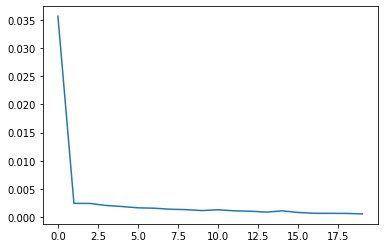

In [14]:
plt.plot(history.history['loss'])

In [15]:
predictions = model.predict(x_train[-n_future:])

In [16]:
predictions

array([[3.6323287]], dtype=float32)

In [20]:
forecast = np.repeat(predictions, df_for_training.shape[1], axis=-1)

In [21]:
y_pred = scaler.inverse_transform(forecast)[:,0]
y_pred

array([124.674385], dtype=float32)